In [26]:
import math
import random

def obj(x,y): #objective function
  value = -(math.cos(math.pi*y))- math.exp(-math.pi*((x-0.5)**2))*(math.sin(math.pi*x)**2)
  return value

def ini_population(sol_num,pop_size,xbit,ybit):
  population = []    
  for i in range(sol_num):
    tmp1 = []  
    for j in range(pop_size-1):
      tmp2 = [] 
      tmp3 = []
      for l in range(xbit):
        tmp2.append(random.randint(0,1)) #get the x by generate 12 random number of 0 or 1 
      for k in range(ybit):
        tmp3.append(random.randint(0,1)) #get the x by generate 11 random number of 0 or 1 
      tmp1.append(tmp2) #get x chromosome 
      tmp1.append(tmp3) #combine x and y chromosome
    population.append(tmp1) #combine chromosom in a population
  return population

In [27]:
'''Convert x and y from binary to decimal'''
def translation(population):
  population_decimalism = []
  for j in range(len(population)):
    
    totalx=0
    for i in range(len(population[0][0])): #Calculate the decimal of x
      totalx += population[j][0][i] * (math.pow(2,i))

    totaly=0
    for k in range(len(population[0][1])): #Calculate the decimal of y
      totaly += population[j][1][k] * (math.pow(2,k))

    total=[]
    total.append(totalx)
    total.append(totaly) #Combine the x and y of each group
    population_decimalism.append(total) #merge each group
  
  #Convert the range of x and y to -1≤x≤2 , 4≤y≤6
  for i in range(len(population)):
    population_decimalism[i][0] = -1 + population_decimalism[i][0]*( 3 / ( (2**12)-1) )
    population_decimalism[i][1] = 4 + population_decimalism[i][1]*( 2 / ( (2**11)-1) )
  
  return population_decimalism

In [28]:
'''Calculate the fitness function value corresponding to each set of chromosomes'''
def fitness(population,generation):
  fitness = []
  population_10 = translation(population) #Convert x and y from binary to decimal
  
  #put x y into objective function with penalty and caculate fitness value
  for i in range(len(population)): 
    value = obj(population_10[i][0],population_10[i][1])+((0.5*generation)**2)*(abs(5-(population_10[i][0]+population_10[i][1]))**2)
    #value = obj(population_10[i][0],population_10[i][1])+5-(population_10[i][0]+population_10[i][1])
    fitness.append(value) 
  return fitness

In [29]:
'''Use the roulette wheel to select the parent'''
def selection(population,fitness_value,parent_number):
  pop_len = len(population)

  for i in range(pop_len): #plus a constant 3
    fitness_value[i] = fitness_value[i]+3
  
  for i in range(pop_len): # reciprocal
    fitness_value[i]=1/fitness_value[i]

  total_fitness = sum(fitness_value) #caculate total fittness
  
  #caculate the probility of a selection pi for each chromosome
  new_fitness = []
  for i in range(len(fitness_value)): 
    new_fitness.append( fitness_value[i]/total_fitness )
  
  #caculate cummulative probility
  for i in range(len(new_fitness)-1,-1,-1): # range(start,stop,[step]) 
    total = 0.0
    j=0
    while(j<=i):
      total += new_fitness[j] 
      j += 1
    new_fitness[i] = total

  #roullte wheel method
  ms = [] #save random number
  for i in range(parent_number): #get n random number between 0 and 1 
    ms.append(random.uniform(0,1))
  ms.sort() #sort

  parents=[]
  for j in range(len(ms)): 
    for i in range(len(population)):
      if new_fitness[i] > ms[j]:
        parents.append(population[i])
        break
  
  return population

In [30]:
'''crossover'''
def crossover(population,prod_crossover):
  pop_len = len(population)
  x_bit = len(population[0][0])
  y_bit = len(population[0][1])

  for i in range(0,pop_len,2): 

    if (random.random() < prod_crossover): # Generate random numbers between 0 and 1
      crossover_point = random.randint(0,len(population[0][0])) 
      tmp1=[]
      tmp2=[]
      tmp3=[]
      tmp4=[]

      # One-point crossover
      tmp1.extend(population[i][0][0:crossover_point]) #Parent one's x crossover with parent two's x
      tmp1.extend(population[i+1][0][crossover_point:x_bit]) 

      tmp2.extend(population[i+1][0][0:crossover_point]) #Parent one's x crossover with parent two's x
      tmp2.extend(population[i][0][crossover_point:x_bit]) 

      tmp3.extend(population[i][1][0:crossover_point])  #Parent one's y crossover with parent two's y
      tmp3.extend(population[i+1][1][crossover_point:y_bit]) 

      tmp4.extend(population[i+1][1][0:crossover_point]) #Parent one's y crossover with parent two's y
      tmp4.extend(population[i][1][crossover_point:y_bit]) 
      
      population[i][0] = tmp1
      population[i+1][0] = tmp2
      population[i][1] = tmp3
      population[i+1][1] = tmp4

      #print('sucessful')
    #else:
      #print('fail')

  return(population)

In [31]:
'''Mutation'''
#One-point Mutation
def mutation(population,prob_mutation):
  y_bit = len(population[0][1])-1
  chrom_len = len(population[0])

  for i in range(len(population)):
      if (random.random() < prob_mutation): # Generate random numbers between 0 and 1

        mutation_point = random.randint(0,y_bit)
        for j in range(chrom_len):
          #Randomly mutate the mutation_point gene point to 0 or 1
          if (population[i][j][mutation_point] == 1):
            population[i][j][mutation_point] = 0
          else:
            population[i][j][mutation_point] = 1
          
        #print('sucessful')
      #else:
        #print('fail')

  return population

In [32]:
'''Find the best fitness and the corresponding x, y in the current Population'''
def best(population):
  pop_len = len(population)
  best_x_y,fitness_value = [],[]
  best_fitness =100

  x_y_10 =translation(population) 
  for i in range(pop_len):
    fitness_value.append( obj( x_y_10[i][0],x_y_10[i][1] ) )#put x and y into objective function

  for i in range(pop_len):
    if (fitness_value[i] < best_fitness): #Compare the fitness of each set of chromosomes to the best value
    #If the fitness of this set of chromosomes < optimal value, replace the optimal solution,and x,y
      best_fitness = fitness_value[i]
      best_x_y = x_y_10[i]

  return best_x_y,best_fitness

In [33]:
import matplotlib.pyplot as plt

def plot(results):
  X = []
  Y = []
  for i in range(iter_num):
    X.append(i)
    Y.append(results[i])
  plt.plot(X,Y)
  plt.xlabel('Number of iteration',size = 15)
  plt.ylabel('fitness value',size = 15)
  plt.title('optimization',size = 15)
  plt.show()

iteration is : 0 Best x and y: [0.4432234432234432, 5.89447972642892] Best fitness -1.904316330708867
iteration is : 1 Best x and y: [0.44395604395604393, 5.893502686858818] Best fitness -1.9043527954740531
iteration is : 2 Best x and y: [0.4461538461538461, 5.921836834391793] Best fitness -1.9328476259013292
iteration is : 3 Best x and y: [0.4747252747252748, 5.932584269662922] Best fitness -1.9693717839876896
iteration is : 4 Best x and y: [0.4747252747252748, 5.932584269662922] Best fitness -1.9693717839876896
iteration is : 5 Best x and y: [0.4747252747252748, 5.932584269662922] Best fitness -1.9693717839876896
iteration is : 6 Best x and y: [0.4747252747252748, 5.932584269662922] Best fitness -1.9693717839876896
iteration is : 7 Best x and y: [0.4747252747252748, 5.932584269662922] Best fitness -1.9693717839876896
iteration is : 8 Best x and y: [0.5369963369963371, 4.049829018075232] Best fitness -1.9700910797479927
iteration is : 9 Best x and y: [0.5377289377289378, 4.04787493893

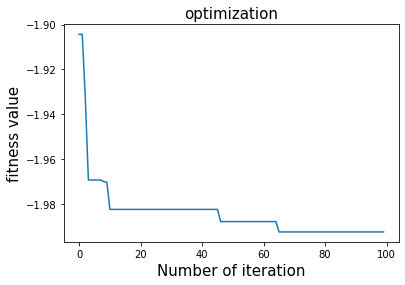

In [41]:
results,parameters,best_x_y = [],[],[]
best_fitness = 1000
iter_num=100
crossover_rate=0.9
mutation_rate=0.1
population_size=100
x_bit=12
y_bit=11
population = ini_population(population_size,2,x_bit,y_bit)

for i in range(iter_num):
  fitness_value = fitness(population,i)
  current_x_y , current_fitness = best(population)
  # Compared with the previous optimal fitness function value, 
  # if it is better, replace the optimal fitness function value and corresponding parameters
  if current_fitness < best_fitness:
    best_fitness = current_fitness
    best_x_y = current_x_y
  
  print('iteration is :',i,'Best x and y:',best_x_y,'Best fitness',best_fitness)
  #record the x y value and fitness in every iteration
  results.append(best_fitness)
  parameters.append(best_x_y)
  selection(population,fitness_value,100)
  crossover(population,crossover_rate) # crossover parents
  mutation(population,mutation_rate) #mutation

print('Final x y are :',parameters[-1],'Final objective value :',best_fitness)
plot(results)